In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
%matplotlib inline
import seaborn as sns
sns.set()
from matplotlib.backends.backend_pdf import PdfPages
#from mpl_toolkits.basemap import Basemap
import matplotlib.cm as cm
import matplotlib.colors as col
import matplotlib as mpl
import numpy as np #import for transposing
import math

In [2]:
data_df = pd.read_csv('../Mongoose Modeling/Updated Census.csv', infer_datetime_format = True)
data_df = pd.DataFrame(data_df,columns = ['Date','Troop Number'])
data_df.head()

,Date,Troop Number
0,NaN,NaN
1,6/13/2000,2
2,6/29/2000,1
3,7/7/2000,NaN
4,7/10/2000,NaN


In [3]:
data_df = data_df.dropna()
data_df["Troop Number"].unique()

array(['2', '1', '8', '35', '13', '10', '32', '12', '20', '29', '25', '14',
       '37', '39', '46', '41', '47', '49', '45', '53', '27', '52', '23',
       '44', '55', '17', '15', '34', '11', '18', '14+5', '28', '5', '19',
       '30', '13+5', '12+2', '15+7', '22', '21', 'Unk', '7', '22+1 ',
       '24+6', '23+13', '28+12', '19+5', '13+3', '40', '36+4', '40+1',
       '26', '39+1', '9', '3', '33', 'Lots', '38', '24', '36', '4', '0',
       '?', '16', '14+9', '7+1', '30+5', '9+2', '20+7', '12+7', '12+',
       '12+6', '8+3', '56', '67', '7+12', '8+13', '34+32', '17+8', '22+15',
       '48', '57', '31', '51+6', '58', '48+', '6', '42', '30+', 'No count',
       '~10', 'Unable to determine', '-', 'not seen', 'not seen ', '50',
       '29+', '51', '43', '54'], dtype=object)

In [4]:
#Fixing clerical errors

data_df.loc[112, "Troop Number"] = 19
data_df.loc[127, "Troop Number"] = 18
data_df.loc[129, "Troop Number"] = 14
data_df.loc[131, "Troop Number"] = 25
data_df.loc[155, "Troop Number"] = 22
data_df.loc[160, "Troop Number"] = 30
data_df.loc[161, "Troop Number"] = 36
data_df.loc[166, "Troop Number"] = 40
data_df.loc[167, "Troop Number"] = 40
data_df.loc[168, "Troop Number"] = 24
data_df.loc[170, "Troop Number"] = 16
data_df.loc[172, "Troop Number"] = 40
data_df.loc[175, "Troop Number"] = 41
data_df.loc[178, "Troop Number"] = 41
data_df.loc[177, "Troop Number"] = 40
data_df.loc[294, "Troop Number"] = 23
data_df.loc[296, "Troop Number"] = 8
data_df.loc[312, "Troop Number"] = 8
data_df.loc[297, "Troop Number"] = 35
data_df.loc[299, "Troop Number"] = 35
data_df.loc[298, "Troop Number"] = 11
data_df.loc[300, "Troop Number"] = 27
data_df.loc[301, "Troop Number"] = 19
data_df.loc[302, "Troop Number"] = 12
data_df.loc[304, "Troop Number"] = 18
data_df.loc[317, "Troop Number"] = 11
data_df.loc[323, "Troop Number"] = 11
data_df.loc[334, "Troop Number"] = 11
data_df.loc[337, "Troop Number"] = 19
data_df.loc[339, "Troop Number"] = 21
data_df.loc[340, "Troop Number"] = 66
data_df.loc[341, "Troop Number"] = 25
data_df.loc[342, "Troop Number"] = 37
data_df.loc[361, "Troop Number"] = 57
data_df.loc[380, "Troop Number"] = 48
data_df.loc[631, "Troop Number"] = 30
data_df.loc[717, "Troop Number"] = 10
data_df.loc[1690, "Troop Number"] = 29

data_df = data_df.drop([193,150,151,274,1683,646,648,817,820,821,826,907,927])

data_df["Troop Number"].unique()

array(['2', '1', '8', '35', '13', '10', '32', '12', '20', '29', '25', '14',
       '37', '39', '46', '41', '47', '49', '45', '53', '27', '52', '23',
       '44', '55', '17', '15', '34', '11', '18', 19, '28', '5', '19', '30',
       18, 14, 25, '22', '21', '7', 22, 30, 36, 40, 24, 16, '40', 41, '26',
       '9', '3', '33', '38', '24', '36', '4', '0', '16', 23, 8, 35, 11, 27,
       12, '56', '67', 21, 66, 37, '48', '57', '31', 57, '58', 48, '6',
       '42', 10, '-', 'not seen', '50', 29, '51', '43', '54'], dtype=object)

In [5]:
data_df = data_df.reset_index(drop = True)
data_df

,Date,Troop Number
0,6/13/2000,2
1,6/29/2000,1
2,9/11/2000,8
3,9/13/2000,35
4,9/15/2000,1
5,9/16/2000,8
6,9/18/2000,13
7,9/22/2000,10
8,9/25/2000,32
9,10/16/2000,12


In [6]:
for i in range(len(data_df)):
    if data_df["Troop Number"][i] == '-':
        data_df = data_df.drop(i)
    elif data_df["Troop Number"][i] == 'not seen':
        data_df = data_df.drop(i)
        
data_df["Troop Number"].unique()

array(['2', '1', '8', '35', '13', '10', '32', '12', '20', '29', '25', '14',
       '37', '39', '46', '41', '47', '49', '45', '53', '27', '52', '23',
       '44', '55', '17', '15', '34', '11', '18', 19, '28', '5', '19', '30',
       18, 14, 25, '22', '21', '7', 22, 30, 36, 40, 24, 16, '40', 41, '26',
       '9', '3', '33', '38', '24', '36', '4', '0', '16', 23, 8, 35, 11, 27,
       12, '56', '67', 21, 66, 37, '48', '57', '31', 57, '58', 48, '6',
       '42', 10, '50', 29, '51', '43', '54'], dtype=object)

In [7]:
data_df["Troop Number"] = pd.to_numeric(data_df["Troop Number"])

data_df["Troop Number"].unique()

array([ 2,  1,  8, 35, 13, 10, 32, 12, 20, 29, 25, 14, 37, 39, 46, 41, 47,
       49, 45, 53, 27, 52, 23, 44, 55, 17, 15, 34, 11, 18, 19, 28,  5, 30,
       22, 21,  7, 36, 40, 24, 16, 26,  9,  3, 33, 38,  4,  0, 56, 67, 66,
       48, 57, 31, 58,  6, 42, 50, 51, 43, 54], dtype=int64)

In [8]:
data_df = data_df.reset_index(drop = True)

##This method is incorrect.
##Fix it later

birth_event = pd.DataFrame()

for i in range(len(data_df)-1):
    if data_df["Troop Number"][i+1] - data_df["Troop Number"][i] > 0:
        birth_event = birth_event.append(data_df.loc[i])
        
birth_event

,Date,Troop Number
1,6/29/2000,1.0
2,9/11/2000,8.0
4,9/15/2000,1.0
5,9/16/2000,8.0
7,9/22/2000,10.0
9,10/16/2000,12.0
10,3/7/2003,20.0
13,2/1/2004,14.0
15,2/3/2004,14.0
16,2/3/2004,39.0


In [9]:
data_df.loc[3]

Date            9/13/2000
Troop Number           35
Name: 3, dtype: object

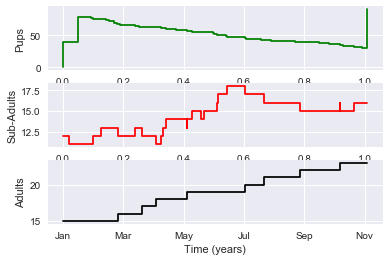

In [13]:
import numpy as np
import pylab as pl

def stoch_model(X0,Y0,Z0,years):
    b = 3.6/4
    s_p = 1 - (0.701)
    s_j = 1 - (0.345)
    s_s = 1 - (0.216)
    s_a = 1 - (0.143)
    ND=MaxTime=years

    INPUT = np.array((X0,Y0,Z0))

###############################################
##Note:  higher group size increases pup survival (escorts) 
##Note: Pups need to be extinct by dry season (transitioned or death occurs)
##Note: Total end population should not be 
##Stoch Function
    
    def stoc_eqs(INP,ts,switch): 
        V = INP
        Rate=np.zeros((6))
        Change=np.zeros((6,3))
        N=np.sum(V[range(3)])
        
        

        if INP.any() < 30: #below carrying capacity
            if switch == 'wet': #during wet season (below CC)
                #print("wet")
                
                Rate[0] = s_p*V[0]; Change[0,:]=([-1, +1, 0]);
                Rate[1] = s_s*V[1];  Change[1,:]=([0, -1, +1]);
                Rate[2] = b*(0.5*(V[2]+V[1]));  Change[2,:]=([+4*(int((0.5*V[2])+(0.25*V[1]))), 0, 0]);
                Rate[3] = (0.701)*V[0];  Change[3,:]=([-1, 0, 0]);
                Rate[4] = (0.216)*V[1];  Change[4,:]=([0, -1, 0]);
                Rate[5] = (0.143)*V[2];  Change[5,:]=([0, 0, -1]);

            else: #during dry season (below CC)
                #print("dry")

                Rate[0] = s_p*V[0]; Change[0,:]=([-1, +1, 0]);
                Rate[1] = s_s*V[1];  Change[1,:]=([0, -1, +1]);
                Rate[2] = 0;  Change[2,:]=([0, 0, 0]);
                Rate[3] = (0.701)*V[0];  Change[3,:]=([-1, 0, 0]);
                Rate[4] = (0.216)*V[1];  Change[4,:]=([0, -1, 0]);
                Rate[5] = (0.143)*V[2];  Change[5,:]=([0, 0, -1]);

        else: #above carrying capacity
                   
            if switch == 'wet': #during wet season (above CC)
                #print("wet")
         
                Rate[0] = s_p*V[0]; Change[0,:]=([-1, +1, 0]);
                Rate[1] = s_s*V[1];  Change[1,:]=([0, -1, +1]);
                Rate[2] = b*(0.5*(V[2]+V[1]));  Change[2,:]=([0, 0, 0]);
                Rate[3] = 4*(0.701)*V[0];  Change[3,:]=([-3, 0, 0]);
                Rate[4] = 4*(0.216)*V[1];  Change[4,:]=([0, -3, 0]);
                Rate[5] = 4*(0.143)*V[2];  Change[5,:]=([0, 0, -3]);

            else: #during dry season (above CC)
                #print("dry")
                
                Rate[0] = s_p*V[0]; Change[0,:]=([-1, +1, 0]);
                Rate[1] = s_s*V[1];  Change[1,:]=([0, -1, +1]);
                Rate[2] = 0;  Change[2,:]=([0, 0, 0]);
                Rate[3] = 4*(0.701)*V[0];  Change[3,:]=([-3, 0, 0]);
                Rate[4] = 4*(0.216)*V[1];  Change[4,:]=([0, -3, 0]);
                Rate[5] = 4*(0.143)*V[2];  Change[5,:]=([0, 0, -3]);

        R1=pl.rand();
        R2=pl.rand();
        ts = -np.log(R2)/(np.sum(Rate));
        ##Convert ts into datetime ts here:
        #################################################################################################
        m=min(pl.find(pl.cumsum(Rate)>=R1*pl.sum(Rate)));
        V[range(3)]=V[range(3)]+Change[m,:]
        return [V,ts]
    
#########################################
##Model Evaluation
    def Stoch_Iteration(INPUT):
        ##lop would also have to be datetime here#######################################
        lop=0
        ##Initialize ts as a datetime here (maybe)###################################
        ts=0
        T=[0]
        S=[0]
        I=[0]
        R=[0]
        while T[lop] < ND:
            lop=lop+1
            ##Be sure lop and ts are datetime compatible#################################
            T.append(T[lop-1]+ts)
            S.append(INPUT[0])
            I.append(INPUT[1])
            R.append(INPUT[2])
            ##Change this to be 2 month intervals##############################
            if T[lop]%1 < (1/12):
                switch = 'wet'
            else:
                switch = 'dry'
            [res,ts] = stoc_eqs(INPUT,ts,switch)
            ##Change these next two lines to be datetime compatible###############################
            lop=lop+1
            T.append(T[lop-1])
            S.append(INPUT[0])
            I.append(INPUT[1])
            R.append(INPUT[2])
        return [T,S,I,R,lop]
    
###############################################
##Model Run
    [T,S,I,R,lop]=Stoch_Iteration(INPUT)
    
    return [T,S,I,R,lop]

#########################################################
##Actual Run
[T,S,I,R,lop]=stoch_model(0,12,15,1) #start w/ 0 pups, 12 subadults, 15 adults, over 10 years

tT=np.array(T)[1:,]
tS=np.array(S)[1:,]
tI=np.array(I)[1:,]
tR=np.array(R)[1:,]

pl.subplot(311)
pl.plot(tT, tS, 'g')
#pl.xlabel ('Time (years)')
pl.ylabel ('Pups')
pl.subplot(312)
pl.plot(tT, tI, 'r')
#pl.xlabel ('Time (years)')
pl.ylabel ('Sub-Adults')
pl.subplot(313).set_xticklabels(['0','Jan','Mar','May','Jul','Sep','Nov','Dec'])
pl.plot(tT, tR, 'k')
pl.xlabel ('Time (years)')
pl.ylabel ('Adults')
pl.show()




In [14]:
S[-1] + I[-1] + R[-1]

130

In [16]:
print("start")
import pandas as pd
from scipy import signal

iters = 1000
trajec = pd.DataFrame(columns = ['t','P','S','A'])
print("hello")
for i in range(iters):
    [t,P,S,A,lop] = stoch_model(0,12,15,10)
    trajec.loc[i,'t'] = t
    trajec.loc[i,'P'] = P
    trajec.loc[i,'S'] = S
    trajec.loc[i,'A'] = A
    print("working at ",i)
    
#for j in range(iters):
    #for k in range(len()):

start
hello
working at  0


KeyboardInterrupt: 

In [ ]:
for i in range(iters):
    plt.plot(trajec.t[i],trajec.P[i])